# 02 - XGBoost

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier

In [8]:
# Load dataset
df = pd.read_csv("bank_numeric.csv")

In [9]:
# Define features and target
target_column = "deposit"
X = df.drop(columns=[target_column])
y = df[target_column]

In [10]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [13]:
# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# wow, here we have some improvements in metrics

# I asked ChatGPT: "why XGBoost worked better than log reg?"
# the answer:
# Non-linear relationships: XGBoost captures complex, non-linear patterns, while Logistic Regression assumes linearity.
# Feature interactions: XGBoost automatically models interactions between features; Logistic Regression requires manual creation.
# Outlier handling: XGBoost is more robust to outliers than Logistic Regression.
# No need for scaling: XGBoost works without feature scaling, unlike Logistic Regression.
# Boosting: XGBoost improves model performance iteratively; Logistic Regression is a single-model approach.
# Better regularization: XGBoost uses L1 & L2 regularization by default to prevent overfitting.
# In your case, XGBoost likely performed better due to complex patterns and interactions in the dataset. 


Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       609
           1       0.86      0.83      0.84       443

    accuracy                           0.87      1052
   macro avg       0.87      0.86      0.87      1052
weighted avg       0.87      0.87      0.87      1052



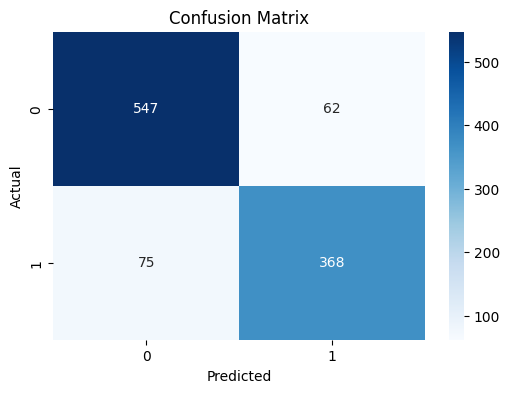

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# here the XGBoost model also has better results
# interesting, could we even improve it more
# by trying other models?